In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')

# Explore Data

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(f'shape_train: {df_train.shape}')
print(f'shape_test: {df_test.shape}')

shape_train: (1460, 81)
shape_test: (1459, 80)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
for i in df_train.columns:
    print(i," : ",df_train[i].isnull().sum())

Id  :  0
MSSubClass  :  0
MSZoning  :  0
LotFrontage  :  259
LotArea  :  0
Street  :  0
Alley  :  1369
LotShape  :  0
LandContour  :  0
Utilities  :  0
LotConfig  :  0
LandSlope  :  0
Neighborhood  :  0
Condition1  :  0
Condition2  :  0
BldgType  :  0
HouseStyle  :  0
OverallQual  :  0
OverallCond  :  0
YearBuilt  :  0
YearRemodAdd  :  0
RoofStyle  :  0
RoofMatl  :  0
Exterior1st  :  0
Exterior2nd  :  0
MasVnrType  :  872
MasVnrArea  :  8
ExterQual  :  0
ExterCond  :  0
Foundation  :  0
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinSF1  :  0
BsmtFinType2  :  38
BsmtFinSF2  :  0
BsmtUnfSF  :  0
TotalBsmtSF  :  0
Heating  :  0
HeatingQC  :  0
CentralAir  :  0
Electrical  :  1
1stFlrSF  :  0
2ndFlrSF  :  0
LowQualFinSF  :  0
GrLivArea  :  0
BsmtFullBath  :  0
BsmtHalfBath  :  0
FullBath  :  0
HalfBath  :  0
BedroomAbvGr  :  0
KitchenAbvGr  :  0
KitchenQual  :  0
TotRmsAbvGrd  :  0
Functional  :  0
Fireplaces  :  0
FireplaceQu  :  690
GarageType  :  81
Gara

# Processing Data

In [10]:
df_train = df_train.drop(['Id','EnclosedPorch','BsmtHalfBath','LowQualFinSF','MiscFeature','Fence','PoolQC','FireplaceQu','MasVnrType','Alley','3SsnPorch'
                       ,'3SsnPorch','ScreenPorch','PoolArea','MiscVal','MiscVal','BsmtFinSF2','Fireplaces'],axis=1)

df_test = df_test.drop(['EnclosedPorch','BsmtHalfBath','LowQualFinSF','MiscFeature','Fence','PoolQC','FireplaceQu','MasVnrType','Alley','3SsnPorch'
                       ,'3SsnPorch','ScreenPorch','PoolArea','MiscVal','MiscVal','BsmtFinSF2','Fireplaces'],axis=1)

In [11]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [12]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dty

In [13]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000


In [14]:
# for train

df_train['WoodDeckSF'] = df_train['WoodDeckSF'].replace(0,np.nan)
df_train['OpenPorchSF'] = df_train['OpenPorchSF'].replace(0,np.nan)
df_train['MasVnrArea'] = df_train['MasVnrArea'].replace(0,np.nan)

mean_WoodDeckSF = df_train['WoodDeckSF'].mean()
df_train['WoodDeckSF'].fillna(mean_WoodDeckSF,inplace=True)

mean_OpenPorchSF = df_train['OpenPorchSF'].mean()
df_train['OpenPorchSF'].fillna(mean_OpenPorchSF,inplace=True)

mean_MasVnrArea = df_train['MasVnrArea'].mean()
df_train['MasVnrArea'].fillna(mean_MasVnrArea,inplace=True)


C:\Users\RPC\AppData\Local\Temp\ipykernel_8224\3778634585.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['WoodDeckSF'].fillna(mean_WoodDeckSF,inplace=True)
C:\Users\RPC\AppData\Local\Temp\ipykernel_8224\3778634585.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [15]:
# for test

df_test['WoodDeckSF'] = df_test['WoodDeckSF'].replace(0,np.nan)
df_test['OpenPorchSF'] = df_test['OpenPorchSF'].replace(0,np.nan)
df_test['MasVnrArea'] = df_test['MasVnrArea'].replace(0,np.nan)

mean_WoodDeckSF = df_test['WoodDeckSF'].mean()
df_test['WoodDeckSF'].fillna(mean_WoodDeckSF,inplace=True)

mean_OpenPorchSF = df_test['OpenPorchSF'].mean()
df_test['OpenPorchSF'].fillna(mean_OpenPorchSF,inplace=True)

mean_MasVnrArea = df_test['MasVnrArea'].mean()
df_test['MasVnrArea'].fillna(mean_MasVnrArea,inplace=True)




C:\Users\RPC\AppData\Local\Temp\ipykernel_8224\3065352994.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['WoodDeckSF'].fillna(mean_WoodDeckSF,inplace=True)
C:\Users\RPC\AppData\Local\Temp\ipykernel_8224\3065352994.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [16]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,192.915888,61.000000,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298.000000,82.307692,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,192.915888,42.000000,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,192.915888,35.000000,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192.000000,84.000000,12,2008,WD,Normal,250000


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemodAdd 

In [18]:
df_train.duplicated().sum()

0

In [19]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,263.557018,448.191956,606.117002,...,1.033821,6.570384,1978.565814,1.879342,503.760512,192.915888,82.307692,6.335466,2007.786106,187033.263254
std,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,139.476418,468.728095,445.834636,...,0.185841,1.584486,25.934444,0.658586,192.261314,75.687717,50.398784,2.694558,1.334307,83165.332151
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,1.000000,0.000000,0.000000,...,1.000000,3.000000,1900.000000,1.000000,160.000000,12.000000,4.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,256.000000,0.000000,270.000000,...,1.000000,5.000000,1960.000000,1.000000,360.000000,178.000000,54.000000,5.000000,2007.000000,132500.000000
50%,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,263.557018,384.500000,525.000000,...,1.000000,6.000000,1982.000000,2.000000,484.000000,192.915888,82.307692,6.000000,2008.000000,165750.000000
75%,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,263.557018,712.750000,846.000000,...,1.000000,7.000000,2003.000000,2.000000,602.500000,192.915888,82.307692,8.000000,2009.000000,221000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,...,3.000000,12.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


In [20]:
df_train['SalePrice'].describe()

count      1094.000000
mean     187033.263254
std       83165.332151
min       35311.000000
25%      132500.000000
50%      165750.000000
75%      221000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [21]:
df_train['SalePrice'].median()

165750.0

[Text(0, 0.5, 'SalePrice'), Text(0.5, 1.0, 'Box Plot On Saleprice')]

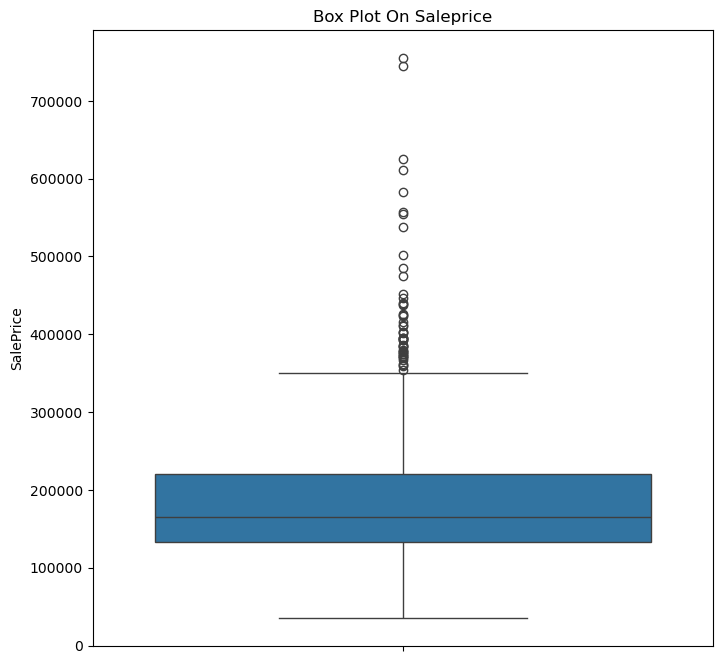

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data=df_train,y="SalePrice",orient="v",ax=axes)

axes.set(ylabel='SalePrice',title="Box Plot On Saleprice")

# Transform dara

In [24]:
# for train data
train_obj = df_train.select_dtypes(include='object')
train_non_obj = df_train.select_dtypes(exclude='object')

In [25]:
# for train data
test_obj = df_test.select_dtypes(include='object')
test_non_obj = df_test.select_dtypes(exclude='object')

In [26]:
for col in train_obj.columns:
    print(f'{col} : {train_obj[col].nunique()}')


MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 1
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 6
BldgType : 5
HouseStyle : 8
RoofStyle : 5
RoofMatl : 7
Exterior1st : 14
Exterior2nd : 16
ExterQual : 4
ExterCond : 4
Foundation : 5
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 4
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 6
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
SaleType : 9
SaleCondition : 6


In [27]:
# for train data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

train_obj1 = train_obj.drop(['Exterior2nd','SaleType','Exterior1st','RoofMatl','HouseStyle','Condition1','Neighborhood'],axis=1)

for i in range(0,train_obj1.shape[1]):
    train_obj1.iloc[:,i]=label.fit_transform(train_obj1.iloc[:,i])

train_obj1 = train_obj1.astype(int)

In [28]:
# for test data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

test_obj1=test_obj.drop(['Exterior2nd','SaleType','Exterior1st','RoofMatl','HouseStyle','Condition1','Neighborhood'],axis=1)

for i in range(0,test_obj1.shape[1]):
    test_obj1.iloc[:,i]=label.fit_transform(test_obj1.iloc[:,i])

test_obj1 = test_obj1.astype(int)

In [29]:
train_data = pd.concat([train_non_obj,train_obj1],axis=1)

In [30]:
test_data = pd.concat([test_non_obj,test_obj1],axis=1)

In [31]:
train_data.shape

(1094, 58)

# Create Model

In [33]:
from sklearn.model_selection import train_test_split

x= train_data.drop(['SalePrice'],axis=1)
y= train_data['SalePrice']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

In [34]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(875, 57) (219, 57)
(875,) (219,)


### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()

In [37]:
m1.fit(x_train,y_train)

LinearRegression()

In [38]:
prediction =m1.predict(x_test)

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

mse = mean_squared_error(y_test,prediction)
print(f'mse : {mse}')

rmse = math.sqrt(mse)
print(f'rmse : {rmse}')

mae = mean_absolute_error(y_test,prediction)
print(f'mae : {mae}')
 
r2_scoree = r2_score(y_test,prediction)
print(f'r2_scoree : {r2_scoree}')

mse : 987281291.5790997
rmse : 31421.032630693404
mae : 21371.604199140853
r2_scoree : 0.8594618852795078


### XGBRegressor

In [41]:
from xgboost import XGBRegressor

m2=XGBRegressor()

In [42]:
m2.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
pred=m2.predict(x_test)

In [44]:
mse = mean_squared_error(y_test,pred)
print(f'mse : {mse}')

rmse = math.sqrt(mse)
print(f'rmse : {rmse}')

mae = mean_absolute_error(y_test,pred)
print(f'mae : {mae}')
 
r2_scoree = r2_score(y_test,pred)
print(f'r2_scoree : {r2_scoree}')

mse : 826552598.3943125
rmse : 28749.82779764624
mae : 18651.255458047945
r2_scoree : 0.8823413905576332


### Test

In [46]:
testx=test_data.drop('Id',axis=1)
predd = m2.predict(testx)

In [47]:
resule_test=pd.DataFrame({'id':test_data['Id'],
                          'Sale_price':predd})

resule_test

,id,Sale_price
0,1461,129262.390625
1,1462,169098.375000
2,1463,181681.937500
3,1464,175311.734375
4,1465,195042.828125
...,...,...
1451,2912,152786.078125
1452,2913,91592.000000
1455,2916,106727.359375
1456,2917,154551.968750


In [48]:
# resule_test.to_csv('submission.csv',index=False)